       Power_range_sensor_1  Power_range_sensor_2  Power_range_sensor_3   \
count            996.000000            996.000000             996.000000   
mean               4.999574              6.379273               9.228112   
std                2.764856              2.312569               2.532173   
min                0.008200              0.040300               2.583966   
25%                2.892120              4.931750               7.511400   
50%                4.881100              6.470500               9.348000   
75%                6.794557              8.104500              11.046800   
max               12.129800             11.928400              15.759900   

       Power_range_sensor_4  Pressure _sensor_1  Pressure _sensor_2  \
count            996.000000          996.000000          996.000000   
mean               7.355272           14.199127            3.077958   
std                4.354778           11.680045            2.126091   
min                0.062300    

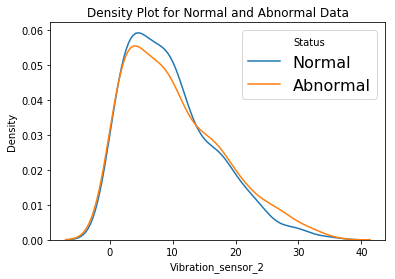

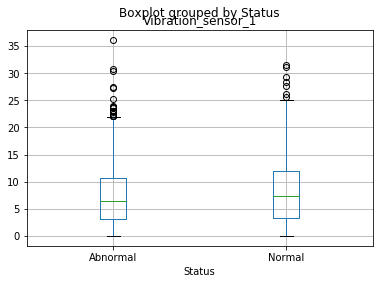

In [2]:
#CMP3751M Machine Learning Assignment 2
#By Gabriella Di Gregorio 15624188
#Task 1
#Description and Data Preprocessing

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#reads in the dataset into dataframe using pandas.read_csv
df = pd.read_csv('CMP3751M_CMP9772M_ML_Assignment 2-dataset-nuclear_plants_final.csv')
df_val = df.values
#assigns all the columns except the first column to the variable X
X = df_val[:,1:13]
#assigns only the first column as variable Y
Y = df_val[:,0]

#LabelEncoder encodes target labels with value between 0 and n_classes-1. (scikit-learn.org, n.d.)
#it can be used to normalize labels and transform non-numerical labels to numerical labels (scikit-learn.org, n.d.)
#The status column is not numerical and since machine learning models are based on mathematical equations, 
#categorical variables need to be changed to numbers.
#OneHotEncoder encodes categorical features as a one-hot numeric array. (scikit-learn.org, n.d.)
#So, the data in the status column is transformed to numerical values, then put into an array.
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features=[0])
X = onehotencoder.fit_transform(X).toarray()
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

#train_test_split is used to split arrays or matrices into random train and test subsets. (scikit-learn.org, n.d.)
#The test size of 0.1 means that 90% of the data will be the training data to train the model,
#and 10% will be the test data to test the model predictions.
#The random state shuffles the data before it is split. 0 uses np.random
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

#StandardScaler standardizes features by removing the mean and scaling to unit variance. (scikit-learn.org, n.d.)
#This process is known as Feature Scaling
#It is important to ensure that all features are on the same scale to avoid issues in the model. 
#So this process converts different scales to a standard scale to make it easier for Machine Learning Algorithms (Gupta, 2019)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#pandas.DataFrame.describe generates descriptive statistics that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution, excluding NaN values. (pandas.pydata.org, n.d.)
#It analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. (pandas.pydata.org, n.d.)
print(df.describe())
#pandas.DataFrame.size returns an int representing the number of elements in this object. (pandas.pydata.org, n.d.)
#Returns the number of rows times number of columns if DataFrame. (pandas.pydata.org, n.d.)
print('\nThe size of the data is: ',df.size)
#pandas.DataFrame.shape returns a tuple representing the dimensionality of the DataFrame. (pandas.pydata.org, n.d.) 
print('The shape of the data is: ', df.shape)
#pandas.DataFrame.columns simply counts the number of columns in the DataFrame, and therefore represents the number of features.
print('There are ',len(df.columns), ' features in the dataset')

#pandas.DataFrame.isnull().values.any() checks if any values in the dataframe are null, and returns a boolean.
print('\nAre there any missing values? ', df.isnull().values.any())

print('\nAll columns are of float64 type except for Status...')
#pandas.DataFrame.select_dtypes returns a subset of columns in a dataframe given a type inclusion or exclusion.
#pandas.DataFrame.dtypes returns the data type
print(df.select_dtypes(exclude=['float64']).dtypes)

#pandas.DataFrame.boxplot makes a box-and-whisker plot from DataFrame columns, optionally grouped by some other columns. (pandas.pydata.org, n.d.)
#A box plot displays groups of data based on their qualities. They show the upper and lower quartiles, the median, 
#and the range of the data.
plt.figure(1)
boxplot = df.boxplot(by='Status', column=['Vibration_sensor_1'])
plt.show()

#The following code is used to make a density plot to show Vibration_sensor_2...
Status = ['Normal', 'Abnormal']

#This for loop goes through each value in the Status column
for stat in Status:
    subset = df[df['Status'] == stat]

    #seaborn.distplot flexibly plots a univariate distribution of observations. (seaborn.pydata.org, n.d.)
    #This function combines the matplotlib hist function (with automatic calculation of a good default bin size),
    #with the seaborn kdeplot() and rugplot() functions.(seaborn.pydata.org, n.d.)
    #Since there are two plots, the histogram is not displayed to avoid confusion, a kde plots a gaussian kernel density estimate,
    #and a label is a legend for the relevant plot component.
    sns.distplot(subset['Vibration_sensor_2'], hist = False, kde = True, label = stat)

#This simply formats the density plot to give it a title, a key, and labeled axis
plt.legend(prop={'size': 16}, title = 'Status')
plt.title('Density Plot for Normal and Abnormal Data')
plt.xlabel('Vibration_sensor_2')
plt.ylabel('Density')

In [3]:
#CMP3751M Machine Learning Assignment 2
#By Gabriella Di Gregorio 15624188
#Task 3
#Artificial Neural Networks

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

#sklearn.neural_network.MLPClassifier: MLP stands for a multi-layer perceptron classifier.
#This model optimizes the log-loss function using LBFGS or stochastic gradient descent. (scikit-learn.org)
#Solver is the solver for weight optimisation. lbfgs is an optimizer in the family of quasi-Newton methods. (scikit-learn.org)
#This solver was chosen because it performs relatively quickly
#Activation function for the hidden layer: ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).(scikit-learn.org)
#hidden_layer_sizes: the ith element represents the number of neurons in the ith hidden layer. (scikit-learn.org)
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(500,500))
#Fits the model to data matrix X and target Y.
clf.fit(X_train,Y_train)
#Predicts using the multi-layer perceptron classifier
Y_predict = clf.predict(X_test)

#sklearn.metrics.confusion_matrix computes confusion matrix to evaluate the accuracy of a classification.
#By definition a confusion matrix C is such that Cij is equal to the number of observations known to be in group i 
#and predicted to be in group j.(scikit-learn.org)
#Takes the groud truth/real values and the estimated targets returned by the classifier
confusion_matrix(Y_test, Y_predict)

#Since all the data was converted to numerical, it was helpful to give them labels to better understand the displayed data.
target_names = ['normal', 'abnormal']
#sklearn.metrics.classification_report build a text report showing the main classification metrics.
#It returns a text summary of the precision, recall, and F1 score for each class, as well as the averages of these.
#It takes the groud truth/real values and the estimated targets returned by the classifier 
#and target_names which are display names matching the labels
print('Artifical Neural Network:')
print(classification_report(Y_test, Y_predict, target_names=target_names))

#sklearn.metrics.accuracy_score 
#In multilabel classification, this function computes subset accuracy: 
#the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.(scikit-learn.org) 
#Takes the ground truth/correct labels and the predicted labels returned by the classifier.
print('accuracy = ', accuracy_score(Y_test, Y_predict))

#sklearn.ensemble.RandomForestClassifier
#A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset
#and uses averaging to improve the predictive accuracy and control over-fitting.(scikit-learn.org)
#The sub-sample size is always the same as the original input sample size 
#but the samples are drawn with replacement because bootstrap=true is left by default. (scikit-learn.org)
#The n_estimators is the number of trees in the forest.
#The min_samples_leaf is the minimum number of samples required to be at a leaf node. 
#A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples 
#in each of the left and right branches. This may have the effect of smoothing the model. (scikit-learn.org)
rfc5 = RandomForestClassifier(n_estimators=1000,min_samples_leaf=5)
#Builds a forest of trees from the training set (X, y).
rfc5.fit(X_train, Y_train)
#Predict class for X. 
#The predicted class of an input sample is a vote by the trees in the forest, weighted by their probability estimates. 
#That is, the predicted class is the one with highest mean probability estimate across the trees. (scikit-learn.org)
#The same steps are repeated that were performed on the MLP Classifier
rfc5_predict = rfc5.predict(X_test)
confusion_matrix(Y_test, rfc5_predict)
print('\nRandom Forest for 5 leaf nodes:')
print(classification_report(Y_test, rfc5_predict, target_names=target_names))
print('accuracy = ', accuracy_score(Y_test, rfc5_predict))
#The same is repeated for 50 leaf nodes instead of 5.
rfc50 = RandomForestClassifier(n_estimators=1000,min_samples_leaf=50)
rfc50.fit(X_train, Y_train)
rfc50_predict = rfc50.predict(X_test)
confusion_matrix(Y_test, rfc50_predict)
print('\nRandom Forest for 50 leaf nodes:')
print(classification_report(Y_test, rfc50_predict, target_names=target_names))
print('accuracy = ', accuracy_score(Y_test, rfc50_predict))

Artifical Neural Network:
             precision    recall  f1-score   support

     normal       0.60      0.67      0.63        49
   abnormal       0.64      0.57      0.60        51

avg / total       0.62      0.62      0.62       100

accuracy =  0.62

Random Forest for 5 leaf nodes:
             precision    recall  f1-score   support

     normal       0.72      0.78      0.75        49
   abnormal       0.77      0.71      0.73        51

avg / total       0.74      0.74      0.74       100

accuracy =  0.74

Random Forest for 50 leaf nodes:
             precision    recall  f1-score   support

     normal       0.71      0.71      0.71        49
   abnormal       0.73      0.73      0.73        51

avg / total       0.72      0.72      0.72       100

accuracy =  0.72


In [4]:
from sklearn.model_selection import cross_val_score
import numpy as np

#Using the cross-validation (CV) function replaces the need to sacrifice some training data for a validation set
#In k-fold, the training set is split into k smaller sets and the model is trained using k-1 of the folds as training data
#and the other as test. k is 10 in this case.
#The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.
#By default, the score computed at each CV iteration is the score method of the estimator. (scikit-learn.org)
#The CV is used on MLP and RFC models, varying the number of hidden layers and the number of trees respectively.
#It is calculated by passing the classifiers from the section above, changing the hidden layer sizes for MLP 
#and the n estimators for RFC. the x, y, and the 10 folds is also passed.
#The mean score is then calculated for each model.

print('Cross Validation Scores for MLP Classifier with 50 hidden layers:')
scores_ANN50 = cross_val_score(MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(50,50)), X, Y, cv=10)
print(scores_ANN50)
print('mean = ', np.mean(scores_ANN50))

print('\nCross Validation Scores for MLP Classifier with 500 hidden layers:')
scores_ANN500 = cross_val_score(MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(500,500)), X, Y, cv=10)
print(scores_ANN500)
print('mean = ', np.mean(scores_ANN500))

print('\nCross Validation Scores for MLP Classifier with 1000 hidden layers:')
scores_ANN1000 = cross_val_score(MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(1000,1000)), X, Y, cv=10)
print(scores_ANN1000)
print('mean = ', np.mean(scores_ANN1000))

print('\nCross Validation Scores for Random Forest Classifier with 20 trees:')
scores_rfc20 = cross_val_score(RandomForestClassifier(n_estimators=20), X, Y, cv=10)
print(scores_rfc20)
print('mean = ', np.mean(scores_rfc20))

print('\nCross Validation Scores for Random Forest Classifier with 500 trees:')
scores_rfc500 = cross_val_score(RandomForestClassifier(n_estimators=500), X, Y, cv=10)
print(scores_rfc500)
print('mean = ', np.mean(scores_rfc500))

print('\nCross Validation Scores for Random Forest Classifier with 10000 trees:')
scores_rfc10000 = cross_val_score(RandomForestClassifier(n_estimators=10000), X, Y, cv=10)
print(scores_rfc10000)
print('mean = ', np.mean(scores_rfc10000))

Cross Validation Scores for MLP Classifier with 50 hidden layers:
[ 0.37        0.47        0.51        0.56        0.81        0.57        0.52
  0.49        0.52040816  0.5       ]
mean =  0.532040816327

Cross Validation Scores for MLP Classifier with 500 hidden layers:
[ 0.42        0.49        0.68        0.55        0.81        0.58        0.42
  0.54        0.54081633  0.52040816]
mean =  0.55512244898

Cross Validation Scores for MLP Classifier with 1000 hidden layers:
[ 0.45        0.52        0.6         0.62        0.72        0.48        0.51
  0.58        0.45918367  0.52040816]
mean =  0.545959183673

Cross Validation Scores for Random Forest Classifier with 20 trees:
[ 0.31        0.51        0.72        0.66        0.84        0.6         0.69
  0.78        0.47959184  0.59183673]
mean =  0.618142857143

Cross Validation Scores for Random Forest Classifier with 500 trees:
[ 0.31        0.49        0.69        0.7         0.86        0.53        0.66
  0.77        0.5306